# Diabetes Analysis

### Author: Ly Duc Trung

### Link: https://github.com/DucTrung1802/DS/blob/main/GLM_Report/diabetes_analysis.ipynb

### Dataset Link: https://www.archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

## 0. Install and import libraries

### 0.1. Install

### 0.2. Import

## 1. Import Data

In [ ]:
input_data = read.csv("diabetes_full_data.csv")

In [ ]:
df = data.frame(input_data)

In [ ]:
df

## 2. Data Preprocessing

### 2.0. Standardize column names

In [ ]:
colnames(df)
# Column "X" should be changed to be a more meaningful name.

In [ ]:
colnames(df)[1] = "Index"

In [ ]:
colnames(df)

### 2.1. Mismatched data types

In [ ]:
str(df)

In [ ]:
# All columns have correct data type

### 2.2. Mixed data values

In [ ]:
# Example: (female, woman, man, male) => (male, female)

In [ ]:
# This dataset contains only number data => No mixed data values

### 2.3. Missing data

#### 2.3.1 Null data

In [ ]:
sum(is.na(df))

In [ ]:
# This dataset has no missing values

#### 2.3.2 Missing data in specific columns

In [ ]:
# We see that in column "Age", the value could have value of 14 
# which is Don’t know / Refused / Missing (_AGEG5YR - BRFSS)

In [ ]:
nrow(subset(df, Age == 14))

In [ ]:
# Conclusion: The dataset has no missing data.

### 2.4. Numeric and Categorical variables classification

In [ ]:
str(df)

In [ ]:
df$HighBP = factor(df$HighBP)

In [ ]:
df$HighChol = factor(df$HighChol)

In [ ]:
df$CholCheck = factor(df$CholCheck)

In [ ]:
df$Smoker = factor(df$Smoker)

In [ ]:
df$Stroke = factor(df$Stroke)

In [ ]:
df$HeartDiseaseorAttack = factor(df$HeartDiseaseorAttack)

In [ ]:
df$PhysActivity = factor(df$PhysActivity)

In [ ]:
df$Fruits = factor(df$Fruits)

In [ ]:
df$Veggies = factor(df$Veggies)

In [ ]:
df$HvyAlcoholConsump = factor(df$HvyAlcoholConsump)

In [ ]:
df$AnyHealthcare = factor(df$AnyHealthcare)

In [ ]:
df$NoDocbcCost = factor(df$NoDocbcCost)

In [ ]:
df$GenHlth = factor(df$GenHlth, ordered=T)

In [ ]:
df$DiffWalk = factor(df$DiffWalk)

In [ ]:
df$Sex = factor(df$Sex)

In [ ]:
df$Age = factor(df$Age, ordered=T)

In [ ]:
df$Education = factor(df$Education, ordered=T)

In [ ]:
df$Income = factor(df$Income, ordered=T)

In [ ]:
df$Diabetes_binary = factor(df$Diabetes_binary)

In [ ]:
str(df)

## 3. Exploratory data analysis (EDA)

### 3.1. Response variable analysis

In [ ]:
barplot(table(df$Diabetes_binary))

### 3.2. Numeric variables analysis

In [ ]:
# Numeric variables (3): BMI, MentHlth, PhysHlth

#### 3.2.1. Overview

In [ ]:
par(mfrow=c(1,3))
boxplot(df$BMI, main="BMI")
boxplot(df$MentHlth, main="MentHlth")
boxplot(df$PhysHlth, main="PhysHlth")

In [ ]:
par(mfrow=c(3,1))
hist(df$BMI, main="BMI", xlab="BMI score")
hist(df$MentHlth, main="MentHlth", xlab="Number of day with Mental Health problem in last 30 days")
hist(df$PhysHlth, main="PhysHlth", xlab="Number of day with Physical Health problem in last 30 days")

#### 3.2.1. BMI

In [ ]:
summary(df$BMI)

In [ ]:
# We see maximum value of BMI is 98 which is abnormal.

In [ ]:
# Boxplot data
boxplot(df$BMI)

In [ ]:
# We see that dataset has several outliers in "BMI" column.

In [ ]:
BMI_q1 = quantile(df$BMI, 0.25)
BMI_q3 = quantile(df$BMI, 0.75)
BMI_iqr = BMI_q3 - BMI_q1
BMI_lower_bound = BMI_q1 - 1.5 * BMI_iqr
BMI_upper_bound = BMI_q3 + 1.5 * BMI_iqr

In [ ]:
BMI_outlier_df = df[df$BMI < BMI_lower_bound | df$BMI > BMI_upper_bound, ]

In [ ]:
nrow(BMI_outlier_df) / nrow(df) * 100

In [ ]:
# We see that the percentage of outliers is approximately about 4%.
# Extreme values of BMI that higher 40 could affect the model.

# To standardize the BMI index, WHO recommendations is used.
# Reference: https://www.who.int/europe/news-room/fact-sheets/item/a-healthy-lifestyle---who-recommendations

# |   BMI     | Nutritional Status | Categorical |
# |-----------|--------------------|-------------|
# | < 18.5    | Underweight        |      1      |
# | 18.5–24.9 | Normal weight      |      2      |
# | 25.0–29.9 | Pre-obesity        |      3      |
# | 30.0–34.9 | Obesity class I    |      4      |
# | 35.0–39.9 | Obesity class II   |      5      |
# | > 40      | Obesity class III  |      6      |

new_column = rep(0, nrow(df))
BMI_index = which(colnames(df) == "BMI")
df_std_1 = cbind(df[,1:BMI_index], StdBMI = new_column, df[,(BMI_index + 1):ncol(df)])

In [ ]:
df_std_1

In [ ]:
df_std_1[df_std_1$BMI < 18.5, ]$StdBMI = 1
df_std_1[df_std_1$BMI >= 18.5 & df_std_1$BMI < 25, ]$StdBMI = 2
df_std_1[df_std_1$BMI >= 25 & df_std_1$BMI < 30, ]$StdBMI = 3
df_std_1[df_std_1$BMI >= 30 & df_std_1$BMI < 35, ]$StdBMI = 4
df_std_1[df_std_1$BMI >= 35 & df_std_1$BMI < 40, ]$StdBMI = 5
df_std_1[df_std_1$BMI >= 40, ]$StdBMI = 6

In [ ]:
df_std_1

In [ ]:
table(df_std_1$StdBMI)

In [ ]:
barplot(table(df_std_1$StdBMI), main="BMI groups (WHO recommendation)")

In [ ]:
df_std_1$StdBMI = factor(df_std_1$StdBMI, ordered = T)

In [ ]:
str(df_std_1)

In [ ]:
# Comment: StdBMI data are categorical.

In [ ]:
# We now must validate the meaningful of this standardizatiton with response variable.

In [ ]:
table(df_std_1$StdBMI, df_std_1$Diabetes_binary)

In [ ]:
chisq.test(table(df_std_1$StdBMI, df_std_1$Diabetes_binary))

In [ ]:
# Comment: A p-value close to 0 shows that there is a difference between diabetes rates among BMI groups.

#### BMI output: df_std_1

In [154]:
str(df_std_1)

'data.frame':	253680 obs. of  24 variables:
 $ Index               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 1 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 2 2 1 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ StdBMI              : Ord.factor w/ 6 levels "1"<"2"<"3"<"4"<..: 6 3 3 3 2 3 4 3 4 2 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 2 2 1 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 2 1 1 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 1 2 1 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 

#### 3.2.2. MentHlth

In [155]:
summary(df_std_1$MentHlth)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   3.185   2.000  30.000 

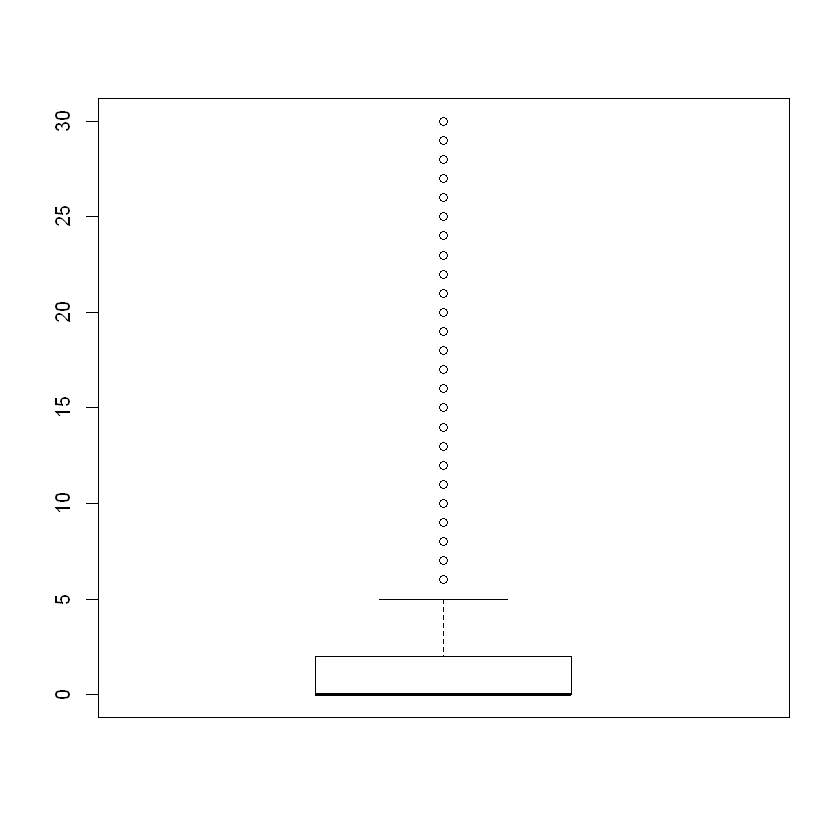

In [156]:
boxplot(df_std_1$MentHlth)

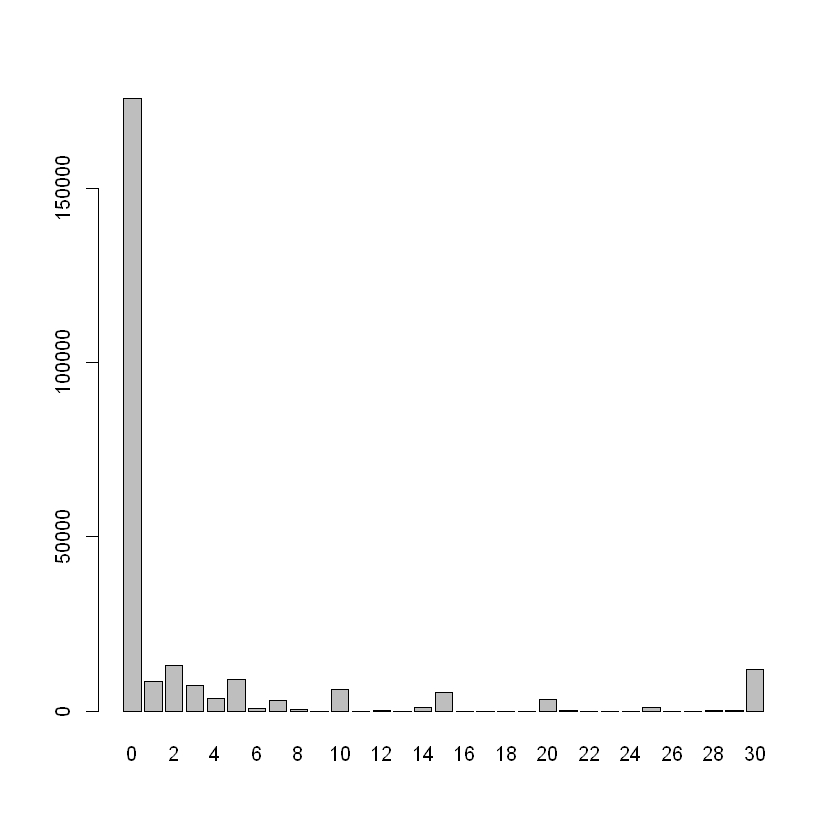

In [157]:
barplot(table(df_std_1$MentHlth))

In [158]:
# We see data with value ZERO is overwhelmed compared to other values.
# Create a binary feature indicates that whether a person has mental health problem.

In [159]:
new_column = rep(0, nrow(df_std_1))
MentHlth_index = which(colnames(df_std_1) == "MentHlth")
df_std_2 = cbind(df_std_1[,1:MentHlth_index], BoolMentHlth = new_column, df_std_1[,(MentHlth_index+1):ncol(df_std_1)])

In [160]:
df_std_2[df_std_2$MentHlth > 0, ]$BoolMentHlth = 1

In [161]:
df_std_2$BoolMentHlth = factor(df_std_2$BoolMentHlth)

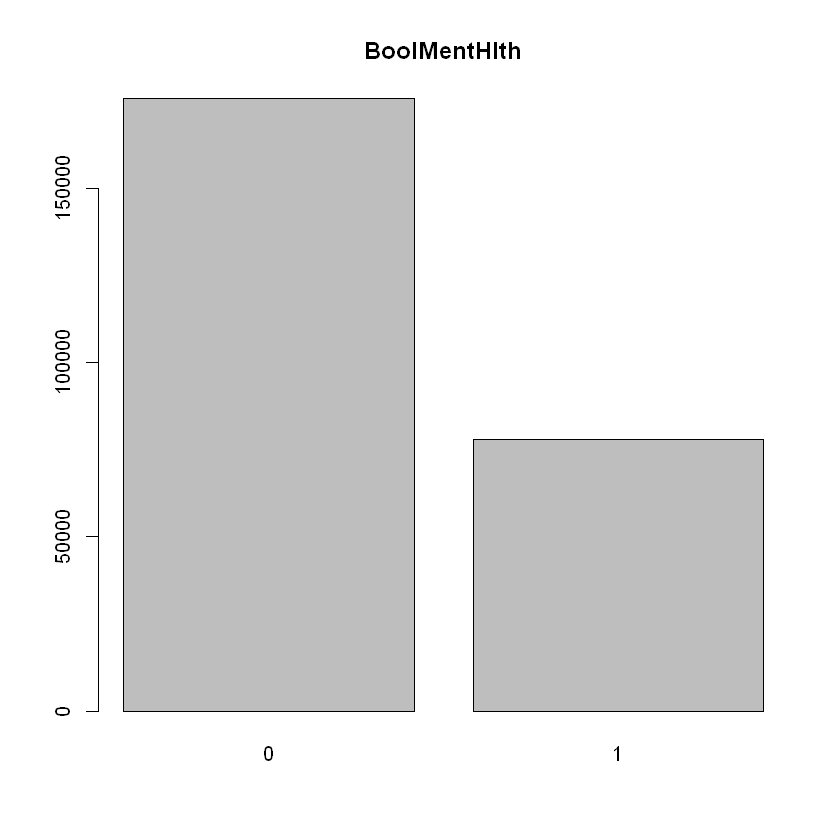

In [162]:
barplot(table(df_std_2$BoolMentHlth), main="BoolMentHlth")

In [166]:
chisq.test(table(df_std_2$BoolMentHlth, df_std_2$Diabetes_binary))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(df_std_2$BoolMentHlth, df_std_2$Diabetes_binary)
X-squared = 178.24, df = 1, p-value < 2.2e-16


#### MentHlth output: df_std_2

In [ ]:
str(df_std_2)

#### 3.2.3. PhysHlth

In [ ]:
summary(df_std_2$PhysHlth)

In [ ]:
boxplot(df_std_1$PhysHlth)

In [ ]:
barplot(table(df_std_2$PhysHlth))

In [ ]:
# We see data with value ZERO is overwhelmed compared to other values.
# Create a binary feature indicates that whether a person has physical health problem.

In [ ]:
new_column = rep(0, nrow(df_std_2))
PhysHlth_index = which(colnames(df_std_2) == "PhysHlth")
df_std_3 = cbind(df_std_2[,1:PhysHlth_index], BoolPhysHlth = new_column, df_std_2[,(PhysHlth_index+1):ncol(df_std_2)])

In [ ]:
df_std_3[df_std_3$PhysHlth > 0, ]$BoolPhysHlth = 1

In [ ]:
df_std_3$BoolPhysHlth = factor(df_std_3$BoolPhysHlth)

#### PhysHlth output: df_std_3

In [ ]:
str(df_std_3)

### 3.3. Categorical data (except "StdBMI", "BoolMentHlth", "BoolPhysHlth")

In [ ]:
# Categorical variables (18): HighBP, HighChol, CholCheck, Smoker, Stroke,
# HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump,
# AnyHealthcare, NoDocbcCost, GenHlth, DiffWalk, Sex, Age, Education, Income.

In [ ]:
par(mfrow=c(3,3))
barplot(table(df$HighBP), horiz=T, main="HighBP")
barplot(table(df$HighChol), horiz=T, main="HighChol")
barplot(table(df$CholCheck), horiz=T, main="CholCheck")
barplot(table(df$Smoker), horiz=T, main="Smoker")
barplot(table(df$Stroke), horiz=T, main="Stroke")
barplot(table(df$HeartDiseaseorAttack), horiz=T, main="HeartDiseaseorAttack")
barplot(table(df$PhysActivity), horiz=T, main="PhysActivity")
barplot(table(df$Fruits), horiz=T, main="Fruits")
barplot(table(df$Veggies), horiz=T, main="Veggies")

## 3. Exploratory data analysis (EDA)

## 4. Model building

## TEST

In [ ]:
# Install and load the package
# install.packages("epitools")
library(epitools)

# Example data (2x2 contingency table)
# Replace this with your actual data
observed <- matrix(c(20, 30, 10, 40), nrow = 2, byrow = TRUE)

# Perform chi-square test, calculate odds ratio, and relative risk
result <- oddsratio(observed)

# Print the result
result